# Veri Hazırlama

Kütüphaneler

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io
import time

import warnings

warnings.filterwarnings("ignore")


C:\Users\OmerYildiz\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\OmerYildiz\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


Veri

In [2]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [3]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [4]:
dataset


Veri Ön İşleme

In [5]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [6]:
train_set


In [7]:
test_set


Veri Görselleştirme

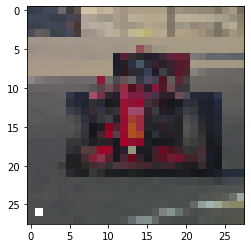

Ferrari
torch.Size([1, 3, 28, 28])


In [8]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [10]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.3741]
Epoch [1/2, loss:1.4830]
Epoch [1/3, loss:1.3109]
Epoch [1/4, loss:1.4621]
Epoch [1/5, loss:1.3032]
Epoch [1/6, loss:1.2937]
Epoch [1/7, loss:1.4273]
Epoch [1/8, loss:1.4181]
Epoch [1/9, loss:1.5801]
Epoch [1/10, loss:1.3421]
Epoch [1/11, loss:1.3891]
Epoch [1/12, loss:1.5955]
Epoch [1/13, loss:1.3448]
Epoch [1/14, loss:1.3690]
Epoch [1/15, loss:1.5891]
Epoch [1/16, loss:1.2802]
Epoch [1/17, loss:1.3531]
Epoch [1/18, loss:1.5831]
Epoch [1/19, loss:1.2868]
Epoch [1/20, loss:1.3612]
Epoch [1/21, loss:1.3419]
Epoch [1/22, loss:1.3658]
Epoch [1/23, loss:1.3345]
Epoch [1/24, loss:1.3624]
Epoch [1/25, loss:1.3207]
Epoch [1/26, loss:1.3075]
Epoch [1/27, loss:1.3570]
Epoch [1/28, loss:1.3106]
Epoch [1/29, loss:1.5979]
Epoch [1/30, loss:1.3491]
Epoch [1/31, loss:1.2955]
Epoch [1/32, loss:1.3297]
Epoch [1/33, loss:1.6078]
Epoch [1/34, loss:1.2750]
Epoch [1/35, loss:1.3413]
Epoch [1/36, loss:1.3431]
Epoch [1/37, loss:1.3319]
Epoch [1/38, loss:1.6247]
Epoch [1/39, loss:1.2

Modelin Testi

In [11]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [12]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 148 / 200 with accuracy 74.00
test doğruluk:
Got 51 / 79 with accuracy 64.56


Modelin Eğitim ve Testi

In [13]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []
acc_list = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)
            acc_list.append(dogruluk)
        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.0893 Accuracy: 40.5063 Error: 59.4937
iteration:  200 Loss: 1.1030 Accuracy: 29.1139 Error: 70.8861
iteration:  300 Loss: 1.0122 Accuracy: 44.3038 Error: 55.6962
iteration:  400 Loss: 0.9816 Accuracy: 29.1139 Error: 70.8861
iteration:  500 Loss: 0.7947 Accuracy: 51.8987 Error: 48.1013
iteration:  600 Loss: 1.0436 Accuracy: 30.3797 Error: 69.6203
iteration:  700 Loss: 0.9918 Accuracy: 45.5696 Error: 54.4304
iteration:  800 Loss: 1.1910 Accuracy: 32.9114 Error: 67.0886
iteration:  900 Loss: 0.3577 Accuracy: 58.2278 Error: 41.7722
iteration: 1000 Loss: 1.1330 Accuracy: 41.7722 Error: 58.2278
iteration: 1100 Loss: 0.0489 Accuracy: 74.6835 Error: 25.3165
iteration: 1200 Loss: 1.2429 Accuracy: 60.7595 Error: 39.2405
iteration: 1300 Loss: 0.0363 Accuracy: 75.9494 Error: 24.0506
iteration: 1400 Loss: 0.3541 Accuracy: 69.6203 Error: 30.3797
iteration: 1500 Loss: 0.0238 Accuracy: 77.2152 Error: 22.7848
iteration: 1600 Loss: 0.0444 Accuracy: 69.6203 Error: 30.3797
iteratio

In [14]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []
acc_list = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)
            acc_list.append(dogruluk)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.3977 Accuracy: 22.7848 Error: 77.2152
iteration:  200 Loss: 1.1429 Accuracy: 34.1772 Error: 65.8228
iteration:  300 Loss: 0.8134 Accuracy: 51.8987 Error: 48.1013
iteration:  400 Loss: 0.6970 Accuracy: 58.2278 Error: 41.7722
iteration:  500 Loss: 0.9603 Accuracy: 51.8987 Error: 48.1013
iteration:  600 Loss: 0.5478 Accuracy: 59.4937 Error: 40.5063
iteration:  700 Loss: 0.7663 Accuracy: 58.2278 Error: 41.7722
iteration:  800 Loss: 0.3421 Accuracy: 58.2278 Error: 41.7722
iteration:  900 Loss: 0.3107 Accuracy: 64.5570 Error: 35.4430
iteration: 1000 Loss: 0.1549 Accuracy: 60.7595 Error: 39.2405
iteration: 1100 Loss: 0.1104 Accuracy: 65.8228 Error: 34.1772
iteration: 1200 Loss: 0.0803 Accuracy: 63.2911 Error: 36.7089
iteration: 1300 Loss: 0.0589 Accuracy: 69.6203 Error: 30.3797
iteration: 1400 Loss: 0.0568 Accuracy: 65.8228 Error: 34.1772
iteration: 1500 Loss: 0.0375 Accuracy: 72.1519 Error: 27.8481
iteration: 1600 Loss: 0.0469 Accuracy: 65.8228 Error: 34.1772
iteratio

Model Save

In [15]:
torch.save(model,"../Model_Save/modelsave.pth") # modelin tamamı kayıt edildi
torch.save(model.state_dict(),"../Model_Save/modelstatedict.pth") # modelin ağırlıkları kayıt edildi

Model Load

In [16]:
model_save = torch.load("../Model_Save/modelsave.pth")

In [17]:
model_save

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fullyconnect1): Linear(in_features=32, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=50, bias=True)
  (fullyconnect3): Linear(in_features=50, out_features=100, bias=True)
  (fullyconnect4): Linear(in_features=100, out_features=4, bias=True)
)

In [18]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [19]:
print("train doğruluk:")
dogruluk(train_loader, model_save)

print("test doğruluk:")
dogruluk(test_loader, model_save)

train doğruluk:
Got 153 / 200 with accuracy 76.50
test doğruluk:
Got 54 / 79 with accuracy 68.35


##### Model ağırlıkları

In [20]:
model_agirlik = Net()
model_agirlik.load_state_dict(torch.load("../Model_Save/modelstatedict.pth"))

<All keys matched successfully>

In [21]:
model_agirlik

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fullyconnect1): Linear(in_features=32, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=50, bias=True)
  (fullyconnect3): Linear(in_features=50, out_features=100, bias=True)
  (fullyconnect4): Linear(in_features=100, out_features=4, bias=True)
)

In [22]:
print("train doğruluk:")
dogruluk(train_loader, model_agirlik)

print("test doğruluk:")
dogruluk(test_loader, model_agirlik)

train doğruluk:
Got 153 / 200 with accuracy 76.50
test doğruluk:
Got 54 / 79 with accuracy 68.35


Özet

In [23]:
from torchsummary import summary
summary(model, input_size=(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 24, 24]             304
               ELU-2            [-1, 4, 24, 24]               0
         MaxPool2d-3            [-1, 4, 12, 12]               0
            Conv2d-4            [-1, 8, 10, 10]             296
               ELU-5            [-1, 8, 10, 10]               0
         MaxPool2d-6              [-1, 8, 5, 5]               0
            Conv2d-7             [-1, 16, 4, 4]             528
               ELU-8             [-1, 16, 4, 4]               0
         MaxPool2d-9             [-1, 16, 2, 2]               0
           Conv2d-10             [-1, 32, 1, 1]           2,080
              ELU-11             [-1, 32, 1, 1]               0
           Linear-12                   [-1, 50]           1,650
              ELU-13                   [-1, 50]               0
           Linear-14                   

Loss Görselleştirme

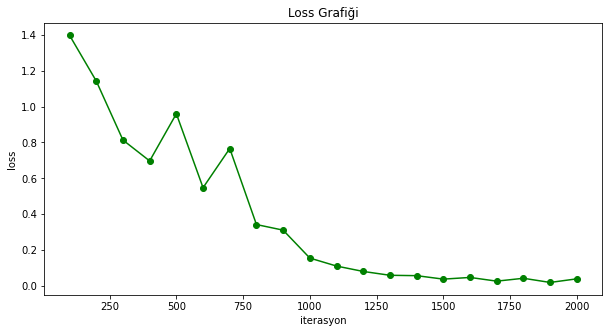

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Loss Grafiği")
plt.plot(iterasyon, kayip, "-o",color="g")

plt.xlabel("iterasyon")
plt.ylabel("loss")
plt.show()

Accuracy Görselleştirme

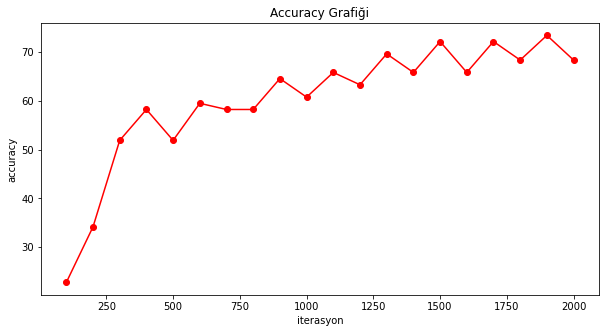

In [25]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Grafiği")

plt.plot(iterasyon, acc_list, "-o", color= "r")

plt.xlabel("iterasyon")
plt.ylabel("accuracy")
plt.show()